# CLEANING DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import statistics as st

df = pd.read_csv('train.csv', encoding = "ISO-8859-1", engine='python')

In [3]:
print(df)

         budget                                  company    country  \
0       8000000            Columbia Pictures Corporation        USA   
1       6000000                       Paramount Pictures        USA   
2      15000000                       Paramount Pictures        USA   
3      18500000   Twentieth Century Fox Film Corporation        USA   
4       9000000                     Walt Disney Pictures        USA   
5       6000000                                  Hemdale         UK   
6      25000000                   Henson Associates (HA)         UK   
7       6000000  De Laurentiis Entertainment Group (DEG)        USA   
8       9000000                       Paramount Pictures        USA   
9      15000000                     SLM Production Group        USA   
10      8800000                            Rimfire Films  Australia   
11     16000000           Thorn EMI Screen Entertainment         UK   
12          NaN   Twentieth Century Fox Film Corporation        USA   
13    

In [4]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,22-08-1986,89.0,8.1,Wil Wheaton,299174.0,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,11-06-1986,103.0,7.8,Matthew Broderick,264740.0,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,16-05-1986,110.0,6.9,Tom Cruise,236909.0,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,18-07-1986,137.0,8.4,Sigourney Weaver,540152.0,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,01-08-1986,90.0,6.9,Joey Cramer,36636.0,Mark H. Baker,1986


In [5]:
df.describe()

,gross,runtime,score,votes,year
count,2.337000e+03,2344.000000,2348.000000,2.348000e+03,2361.000000
mean,4.036520e+07,106.659556,6.368739,8.438583e+04,1996.127065
std,6.026854e+07,18.214522,1.012303,1.426969e+05,8.807352
min,0.000000e+00,69.000000,2.200000,1.030000e+02,1986.000000
25%,3.393161e+06,95.000000,5.700000,6.666000e+03,1988.000000
50%,1.776890e+07,102.000000,6.400000,3.196100e+04,1994.000000
75%,5.197069e+07,115.000000,7.100000,9.516525e+04,2006.000000
max,7.605076e+08,357.000000,9.000000,1.839571e+06,2011.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 15 columns):
budget      2276 non-null object
company     2361 non-null object
country     2331 non-null object
director    2361 non-null object
genre       2361 non-null object
gross       2337 non-null float64
name        2361 non-null object
rating      2356 non-null object
released    2361 non-null object
runtime     2344 non-null float64
score       2348 non-null float64
star        2361 non-null object
votes       2348 non-null float64
writer      2361 non-null object
year        2361 non-null int64
dtypes: float64(4), int64(1), object(10)
memory usage: 276.8+ KB


In [7]:
df.size

35415

In [8]:
df.shape

(2361, 15)

In [9]:
df.count(axis=0, level=None, numeric_only=False)

budget      2276
company     2361
country     2331
director    2361
genre       2361
gross       2337
name        2361
rating      2356
released    2361
runtime     2344
score       2348
star        2361
votes       2348
writer      2361
year        2361
dtype: int64

In [10]:
df.dtypes

budget       object
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [11]:
A=set()
for index,row in df.genre.iteritems():
    A.add(df.loc[index,'genre'])

In [12]:
print(A)

{'Action', 'Drama', 'Sci-Fi', 'Family', 'Animation', 'Crime', 'War', 'Romance', 'Biography', 'Horror', 'Mystery', 'Fantasy', 'Thriller', 'Comedy', 'Adventure', 'Musical'}


In [13]:
rom=df[df['genre']=="Romance"]
    
rom['rating']=rom['rating'].replace('Not specified','PG')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
print(rom)

      budget                   company country            director    genre  \
604  1412434                  CB Films  France  Catherine Breillat  Romance   
620  8272908  Golan-Globus Productions     USA       Boaz Davidson  Romance   

         gross         name rating    released  runtime  score  \
604   410109.0  36 fillette     PG  06-01-1989     88.0    6.0   
620  8892589.0        Salsa     PG  06-05-1988     98.0    4.9   

                 star  votes              writer  year  
604  Delphine Zentout  938.0  Catherine Breillat  1988  
620        Draco Rosa  900.0       Boaz Davidson  1988  


In [15]:
adven=df[df['genre']=="Adventure"]
print(adven)

         budget                                  company    country  \
0       8000000            Columbia Pictures Corporation        USA   
4       9000000                     Walt Disney Pictures        USA   
6      25000000                   Henson Associates (HA)         UK   
10      8800000                            Rimfire Films  Australia   
24     25000000                       Paramount Pictures        USA   
33     24500000                             Warner Bros.         UK   
40     25000000                  The Saul Zaentz Company        USA   
51     18000000                      ABC Motion Pictures        USA   
67     15000000                             Warner Bros.        USA   
85            0                  Fuji Television Network      Japan   
92     40000000                  Carthago Films S.a.r.l.     France   
112           0              Cannon Screen Entertainment         UK   
126    17000000                           HandMade Films         UK   
141   

In [16]:
adven.count(axis=0, level=None, numeric_only=False)

budget      149
company     154
country     152
director    154
genre       154
gross       153
name        154
rating      154
released    154
runtime     152
score       154
star        154
votes       154
writer      154
year        154
dtype: int64

In [17]:
rom.shape

(2, 15)

In [18]:
adven.shape

(154, 15)

In [19]:
adven=adven.replace('0',np.nan)
adven=adven.replace(' ',np.nan)

In [20]:
print(adven)

         budget                                  company    country  \
0       8000000            Columbia Pictures Corporation        USA   
4       9000000                     Walt Disney Pictures        USA   
6      25000000                   Henson Associates (HA)         UK   
10      8800000                            Rimfire Films  Australia   
24     25000000                       Paramount Pictures        USA   
33     24500000                             Warner Bros.         UK   
40     25000000                  The Saul Zaentz Company        USA   
51     18000000                      ABC Motion Pictures        USA   
67     15000000                             Warner Bros.        USA   
85          NaN                  Fuji Television Network      Japan   
92     40000000                  Carthago Films S.a.r.l.     France   
112         NaN              Cannon Screen Entertainment         UK   
126    17000000                           HandMade Films         UK   
141   

In [21]:
adven1=adven.dropna()

In [22]:
print(adven1)

         budget                                  company    country  \
0       8000000            Columbia Pictures Corporation        USA   
4       9000000                     Walt Disney Pictures        USA   
6      25000000                   Henson Associates (HA)         UK   
10      8800000                            Rimfire Films  Australia   
24     25000000                       Paramount Pictures        USA   
33     24500000                             Warner Bros.         UK   
40     25000000                  The Saul Zaentz Company        USA   
51     18000000                      ABC Motion Pictures        USA   
67     15000000                             Warner Bros.        USA   
92     40000000                  Carthago Films S.a.r.l.     France   
126    17000000                           HandMade Films         UK   
157    25000000  De Laurentiis Entertainment Group (DEG)        USA   
217     1099999             CBS Entertainment Production        USA   
220   

In [23]:
adven1["budget"].mean()

inf

Since the mean of the data is inf.The better way to replace NaN values is using interpolation.

In [24]:
import math
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')

In [25]:
adven["budget"]=adven["budget"].astype("float").interpolate()

In [26]:
adven["budget"]

0         8000000.0
4         9000000.0
6        25000000.0
10        8800000.0
24       25000000.0
33       24500000.0
40       25000000.0
51       18000000.0
67       15000000.0
85       27500000.0
92       40000000.0
112      28500000.0
126      17000000.0
141      21000000.0
157      25000000.0
217       1099999.0
220      16000000.0
227      22700000.0
244      23000000.0
282       1000000.0
338      26556877.0
380        810817.0
389         68171.0
410        109949.0
433       8972582.0
468        876349.0
494      46630000.0
506      13000000.0
542      17500000.0
553       8947041.0
           ...     
1949     20000000.0
2002     90000000.0
2035     75000000.0
2038    250000000.0
2040     23600000.0
2051     24300000.0
2066     25000000.0
2081     50000000.0
2084     40000000.0
2093     50000000.0
2095     60000000.0
2131    150000000.0
2132    100000000.0
2135    100000000.0
2142     70000000.0
2162      3900000.0
2174     21000000.0
2181     70000000.0
2209     95000000.0


In [27]:
adven["country"]

0             USA
4             USA
6              UK
10      Australia
24            USA
33             UK
40            USA
51            USA
67            USA
85          Japan
92         France
112            UK
126            UK
141            UK
157           USA
217           USA
220           USA
227           USA
244           USA
282           USA
338           USA
380           USA
389     Hong Kong
410           USA
433           USA
468        France
494            UK
506           USA
542           USA
553        France
          ...    
1949       Russia
2002          NaN
2035          USA
2038           UK
2040          USA
2051        India
2066          USA
2081          USA
2084           UK
2093      Denmark
2095          USA
2131          NaN
2132          USA
2135      Germany
2142        Spain
2162          USA
2174          USA
2181          USA
2209           UK
2216          USA
2217          USA
2244          USA
2250          USA
2258          USA
2271      

since the categorical column ha nan values i feel like replacing with the nan with the mode is the best way.

In [28]:
adven["country"].mode()

0    USA
dtype: object

In [29]:

adven["country"]=adven["country"].replace(np.nan,"USA")

In [30]:
adven["country"].count()

154

In [31]:
advenmean=adven1["gross"].mean()

In [32]:
adven["gross"]=adven["gross"].replace(np.nan,"advenmean")

In [33]:
adven["gross"].count()

154

Since therer are unrated and not rated in the categorical data i just replaced with the mode because there is no relation between any columns.

In [34]:
adven["rating"].mode()

0    PG
dtype: object

In [35]:
adven["rating"]=adven["rating"].replace("UNRATED","PG")

In [36]:
adven["rating"]

0               R
4              PG
6              PG
10          PG-13
24             PG
33             PG
40             PG
51             PG
67              R
85              G
92          PG-13
112             R
126         PG-13
141            PG
157             R
217            PG
220            PG
227            PG
244         PG-13
282            PG
338            PG
380             R
389             R
410         PG-13
433             G
468             R
494            PG
506            PG
542            PG
553            PG
          ...    
1949            R
2002           PG
2035            R
2038           PG
2040            R
2051        PG-13
2066            R
2081        PG-13
2084        PG-13
2093    NOT RATED
2095        PG-13
2131           PG
2132        PG-13
2135           PG
2142            R
2162        PG-13
2174        PG-13
2181           PG
2209           PG
2216           PG
2217        PG-13
2244            R
2250        PG-13
2258            G
2271      

In [37]:
adven["rating"]=adven["rating"].replace("NOT RATED","PG")
adven["rating"]=adven["rating"].replace("Not specified","PG")

In [38]:
adven["rating"]

0           R
4          PG
6          PG
10      PG-13
24         PG
33         PG
40         PG
51         PG
67          R
85          G
92      PG-13
112         R
126     PG-13
141        PG
157         R
217        PG
220        PG
227        PG
244     PG-13
282        PG
338        PG
380         R
389         R
410     PG-13
433         G
468         R
494        PG
506        PG
542        PG
553        PG
        ...  
1949        R
2002       PG
2035        R
2038       PG
2040        R
2051    PG-13
2066        R
2081    PG-13
2084    PG-13
2093       PG
2095    PG-13
2131       PG
2132    PG-13
2135       PG
2142        R
2162    PG-13
2174    PG-13
2181       PG
2209       PG
2216       PG
2217    PG-13
2244        R
2250    PG-13
2258        G
2271       PG
2289    PG-13
2291    PG-13
2295       PG
2323    PG-13
2358       PG
Name: rating, Length: 154, dtype: object

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot, show  



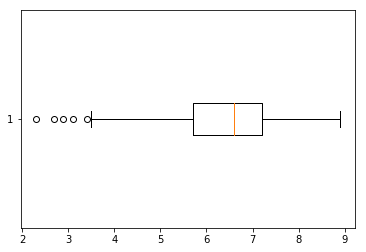

In [40]:
values1=adven['score']
plt.boxplot(values1, vert=False)   
plt.show()

since there are outliers it is better to find the median of runtime and then with respect to that find the score of the movie and find mean f it .So, finnaly u can replace the values of Nan with mean

In [41]:
adven['score'].median()

6.6

In [42]:
Ascore=adven[adven['score']==6.6]

In [43]:
Ascore['runtime'].mean()

115.5

In [44]:
adven['runtime']=adven['runtime'].replace(np.nan,115.5)

In [45]:
adven['runtime']

0        89.0
4        90.0
6       101.0
10       97.0
24      119.0
33      125.0
40      117.0
51      107.0
67       98.0
85       90.0
92      121.0
112     117.0
126      97.0
141      88.0
157     127.0
217     100.0
220      98.0
227      96.0
244      89.0
282     100.0
338      90.0
380      87.0
389     104.0
410      94.0
433      88.0
468     168.0
494     126.0
506      95.0
542     116.0
553      96.0
        ...  
1949    126.0
2002     96.0
2035    153.0
2038    153.0
2040     88.0
2051    170.0
2066    111.0
2081    130.0
2084    123.0
2093     93.0
2095     97.0
2131    105.0
2132    102.0
2135    101.0
2142    127.0
2162    100.0
2174    100.0
2181     92.0
2209    118.0
2216    108.0
2217    110.0
2244     94.0
2250    124.0
2258    100.0
2271    113.0
2289    165.0
2291     82.0
2295     85.0
2323    130.0
2358    126.0
Name: runtime, Length: 154, dtype: float64

In [46]:
adven.count(axis=0, level=None, numeric_only=False)

budget      154
company     154
country     154
director    154
genre       154
gross       154
name        154
rating      154
released    154
runtime     154
score       154
star        154
votes       154
writer      154
year        154
dtype: int64

In [47]:
adven.shape

(154, 15)

In [48]:
music=df[df['genre']=="Musical"]
fam=df[df['genre']=="Family"]
scifi=df[df['genre']=="Sci-Fi"]
horror=df[df['genre']=="Horror"]
bio=df[df['genre']=="Biography"]
thriller=df[df['genre']=="Thriller"]
comedy=df[df['genre']=="Comedy"]
fantasy=df[df['genre']=="Fantasy"]
crime=df[df['genre']=="Crime"]
mystery=df[df['genre']=="Mystery"]
war=df[df['genre']=="War"]
animation=df[df['genre']=="Animation"]
action=df[df['genre']=="Action"]
drama=df[df['genre']=="Drama"]

In [49]:
music.shape

(1, 15)

In [50]:
music

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
134,0.0,Edward R. Pressman Film,USA,David Byrne,Musical,2545142.0,True Stories,PG,10-10-1986,90.0,7.0,David Byrne,3885.0,Stephen Tobolowsky,1986


budget =0.0 and number of rows in music data frame is also one so i have no option to replace my 0 values so i can delete the row.

In [51]:
fam.shape

(5, 15)

In [52]:
fam

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
190,100000.0,Hyperion Pictures,USA,Carroll Ballard,Family,781727.0,Nutcracker,G,26-11-1986,100.0,7.2,Hugh Bigney,578.0,Kent Stowell,1986
218,453456.0,DIC Entertainment,Canada,Bruno Bianchi,Family,NaN,Heathcliff: The Movie,G,17-01-1986,73.0,5.3,Mel Blanc,187.0,George Gately,1986
518,5000000.0,Columbia Pictures Corporation,Sweden,Ken Annakin,Family,3569939.0,Las travesuras de una pelirojja,G,29-07-1988,100.0,5.9,Tami Erin,3474.0,Astrid Lindgren,1988
728,35000000.0,TMS Entertainment,Japan,Masami Hata,Family,1368210.0,Little Nemo: Adventures in Slumberland,G,21-08-1992,85.0,7.2,Gabriel Damon,5800.0,Chris Columbus,1989
1173,20000000.0,Ben-Ami/Leeds Productions,USA,Charles T. Kanganis,Family,11784000.0,3 Ninjas Kick Back,PG,06-05-1994,93.0,4.4,Victor Wong,7189.0,Sang-ok Shin,1994


In [53]:
fam.count(axis=0, level=None, numeric_only=False)

budget      5
company     5
country     5
director    5
genre       5
gross       4
name        5
rating      5
released    5
runtime     5
score       5
star        5
votes       5
writer      5
year        5
dtype: int64

In [54]:
fam["gross"]=fam["gross"].astype("float").interpolate()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
fam

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
190,100000.0,Hyperion Pictures,USA,Carroll Ballard,Family,781727.0,Nutcracker,G,26-11-1986,100.0,7.2,Hugh Bigney,578.0,Kent Stowell,1986
218,453456.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2175833.0,Heathcliff: The Movie,G,17-01-1986,73.0,5.3,Mel Blanc,187.0,George Gately,1986
518,5000000.0,Columbia Pictures Corporation,Sweden,Ken Annakin,Family,3569939.0,Las travesuras de una pelirojja,G,29-07-1988,100.0,5.9,Tami Erin,3474.0,Astrid Lindgren,1988
728,35000000.0,TMS Entertainment,Japan,Masami Hata,Family,1368210.0,Little Nemo: Adventures in Slumberland,G,21-08-1992,85.0,7.2,Gabriel Damon,5800.0,Chris Columbus,1989
1173,20000000.0,Ben-Ami/Leeds Productions,USA,Charles T. Kanganis,Family,11784000.0,3 Ninjas Kick Back,PG,06-05-1994,93.0,4.4,Victor Wong,7189.0,Sang-ok Shin,1994


In [56]:
scifi.shape

(8, 15)

In [57]:
scifi

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
87,18000000.0,Gladden Entertainment,USA,Marshall Brickman,Sci-Fi,3900000.0,The Manhattan Project,PG-13,13-06-1986,117.0,6.1,John Lithgow,4666.0,Marshall Brickman,1986
318,3655565.0,Trans World Entertainment (TWE),USA,David Keith,Sci-Fi,1930001.0,The Curse,R,11-09-1987,92.0,4.9,Wil Wheaton,1762.0,David Chaskin,1987
749,4000000.0,Lightyear Entertainment,USA,Jim Wynorski,Sci-Fi,192816.0,The Return of Swamp Thing,PG-13,12-05-1989,84.0,4.5,Dick Durock,3054.0,Len Wein,1989
952,1500000.0,Palace Pictures,UK,Richard Stanley,Sci-Fi,5728953.0,Hardware,R,14-09-1990,94.0,5.9,Dylan McDermott,10546.0,Steve MacManus,1990
1298,20000000.0,Triumph Films,Canada,Christian Duguay,Sci-Fi,5781885.0,Asesinos cibernéticos,R,26-01-1996,108.0,6.4,Peter Weller,21565.0,Philip K. Dick,1995
1372,25000000.0,Live Entertainment,USA,David Twohy,Sci-Fi,14048372.0,The Arrival,PG-13,31-05-1996,115.0,6.3,Charlie Sheen,27641.0,David Twohy,1996
1894,80000000.0,Warner Bros.,USA,Oliver Hirschbiegel,Sci-Fi,15071514.0,The Invasion,PG-13,17-08-2007,99.0,5.9,Nicole Kidman,67939.0,David Kajganich,2007
2061,30000000.0,TriStar Pictures,South Africa,Neill Blomkamp,Sci-Fi,115646235.0,Sector 9,R,14-08-2009,112.0,8.0,Sharlto Copley,566581.0,Neill Blomkamp,2009


In [58]:
scifi.count(axis=0, level=None, numeric_only=False)

budget      8
company     8
country     8
director    8
genre       8
gross       8
name        8
rating      8
released    8
runtime     8
score       8
star        8
votes       8
writer      8
year        8
dtype: int64

In [59]:
horror.count(axis=0, level=None, numeric_only=False)

budget      124
company     126
country     123
director    126
genre       126
gross       123
name        126
rating      126
released    126
runtime     124
score       125
star        126
votes       125
writer      126
year        126
dtype: int64

In [60]:
horror.shape

(126, 15)

In [61]:
horror=horror.replace(0,np.nan)
horror=horror.replace(' ',np.nan)

In [62]:
horror1=horror.dropna()

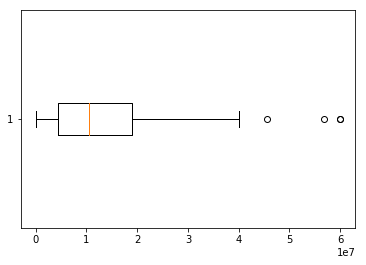

In [63]:
values2=horror1['budget']
plt.boxplot(values2, vert=False)   
plt.show()

There are outliers so replace the values with median

In [64]:
horror1["budget"].median()

10500000.0

In [65]:
horror["budget"]=horror["budget"].replace(np.nan,horror1["budget"].median())

In [66]:
horror["country"].mode()

0    USA
dtype: object

In [67]:
horror["country"]=horror["country"].replace(np.nan,"USA")

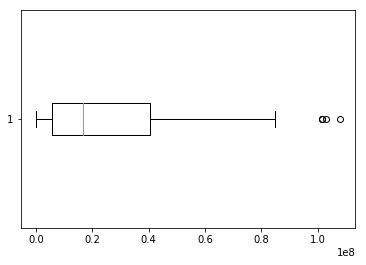

In [68]:
values3=horror1['gross']
plt.boxplot(values3, vert=False)   
plt.show()

In [69]:
horror["gross"]=horror["gross"].replace(np.nan,horror1["gross"].median())

In [70]:
horror['rating'].mode()

0    R
dtype: object

In [71]:
horror["rating"]=horror["rating"].replace("NOT RATED","R")
horror["rating"]=horror["rating"].replace("Not specified","R")
horror["rating"]=horror["rating"].replace("UNRATED","R")

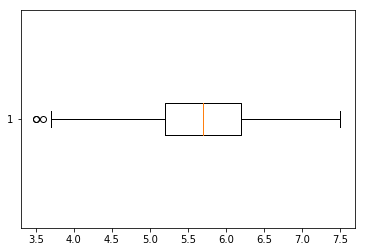

In [72]:
values5=horror1['score']
plt.boxplot(values5, vert=False)   
plt.show()

In [73]:
horror["score"]=horror["score"].replace(np.nan,horror["score"].mean())

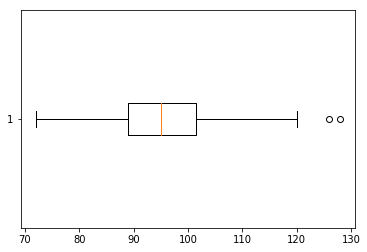

In [74]:
values6=horror1['runtime']
plt.boxplot(values6, vert=False)   
plt.show()

In [75]:
horror["runtime"]=horror["runtime"].astype("float").interpolate()

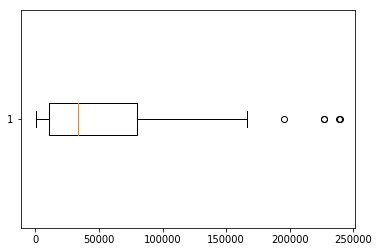

In [76]:
values7=horror1['votes']
plt.boxplot(values7, vert=False)   
plt.show()

In [77]:
horror["votes"]=horror["votes"].replace(np.nan,horror["votes"].median())

In [78]:
horror.count(axis=0, level=None, numeric_only=False)

budget      126
company     126
country     126
director    126
genre       126
gross       126
name        126
rating      126
released    126
runtime     126
score       126
star        126
votes       126
writer      126
year        126
dtype: int64

In [79]:
bio.shape

(94, 15)

In [80]:
bio=bio.replace(0.0,np.nan)
bio=bio.replace(' ',np.nan)

In [81]:
bio

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
42,4000000.0,Initial Pictures,UK,Alex Cox,Biography,2826523.0,Sid and Nancy,R,07-11-1986,112.0,7.1,Gary Oldman,25032.0,Alex Cox,1986
50,111000.0,Maljack Productions,USA,John McNaughton,Biography,609939.0,Henry: Portrait of a Serial Killer,UNRATED,07-09-1990,83.0,7.0,Michael Rooker,25367.0,Richard Fire,1986
100,8500000.0,Capital Equipment Leasing,UK,Trevor Nunn,Biography,277646.0,Lady Jane,PG-13,07-02-1986,136.0,7.2,Helena Bonham Carter,5364.0,Chris Bryant,1986
114,NaN,British Film Institute (BFI),UK,Derek Jarman,Biography,3151.0,Caravaggio,Not specified,29-08-1986,93.0,6.7,Noam Almaz,4072.0,Derek Jarman,1986
161,NaN,Canadian Broadcasting Corporation (CBC),Canada,Charles Jarrott,Biography,275000.0,The Boy in Blue,R,17-01-1986,100.0,5.4,Nicolas Cage,907.0,Douglas Bowie,1986
166,14000000.0,Columbia Pictures Corporation,USA,Richard Pryor,Biography,18034150.0,"Jo Jo Dancer, Your Life Is Calling",R,02-05-1986,97.0,6.3,Richard Pryor,1288.0,Rocco Urbisci,1986
186,352885327.0,Caméras Continentales,Denmark,Henning Carlsen,Biography,583800.0,Oviri,R,05-09-1986,100.0,6.2,Donald Sutherland,275.0,Henning Carlsen,1986
256,23000000.0,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230.0,The Last Emperor,PG-13,15-04-1988,163.0,7.8,John Lone,76408.0,Mark Peploe,1987
257,13000000.0,Touchstone Pictures,USA,Barry Levinson,Biography,123922370.0,"Good Morning, Vietnam",R,15-01-1988,121.0,7.3,Robin Williams,106924.0,Mitch Markowitz,1987
261,6500000.0,Columbia Pictures Corporation,USA,Luis Valdez,Biography,54215416.0,La Bamba,PG-13,24-07-1987,108.0,6.8,Lou Diamond Phillips,22839.0,Luis Valdez,1987


In [82]:
bio.count(axis=0, level=None, numeric_only=False)

budget      87
company     94
country     94
director    94
genre       94
gross       94
name        94
rating      94
released    94
runtime     94
score       93
star        94
votes       93
writer      94
year        94
dtype: int64

In [83]:
bio1=bio.dropna()


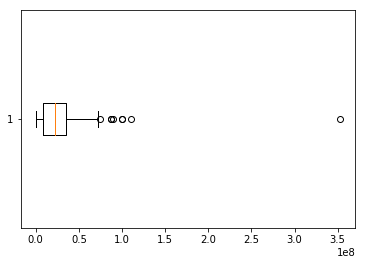

In [84]:
values8=bio1['budget']
plt.boxplot(values8, vert=False)   
plt.show()

outlier in the graph

In [85]:
bio['budget']=bio['budget'].replace(np.nan,bio1['budget'].median())

In [86]:
bio1["rating"].mode()

0    R
dtype: object

In [87]:
bio["rating"]=bio["rating"].replace("NOT RATED","R")
bio["rating"]=bio["rating"].replace("Not specified","R")
bio["rating"]=bio["rating"].replace("UNRATED","R")

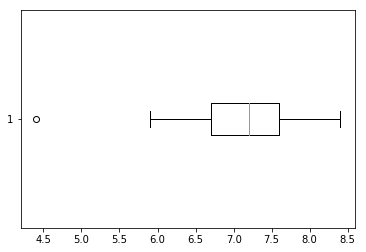

In [88]:
values9=bio1['score']
plt.boxplot(values9, vert=False)   
plt.show()

In [89]:
bio["score"]=bio["score"].replace(np.nan,bio["score"].median())

In [90]:
bio

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
42,4000000.0,Initial Pictures,UK,Alex Cox,Biography,2826523.0,Sid and Nancy,R,07-11-1986,112.0,7.1,Gary Oldman,25032.0,Alex Cox,1986
50,111000.0,Maljack Productions,USA,John McNaughton,Biography,609939.0,Henry: Portrait of a Serial Killer,R,07-09-1990,83.0,7.0,Michael Rooker,25367.0,Richard Fire,1986
100,8500000.0,Capital Equipment Leasing,UK,Trevor Nunn,Biography,277646.0,Lady Jane,PG-13,07-02-1986,136.0,7.2,Helena Bonham Carter,5364.0,Chris Bryant,1986
114,22000000.0,British Film Institute (BFI),UK,Derek Jarman,Biography,3151.0,Caravaggio,R,29-08-1986,93.0,6.7,Noam Almaz,4072.0,Derek Jarman,1986
161,22000000.0,Canadian Broadcasting Corporation (CBC),Canada,Charles Jarrott,Biography,275000.0,The Boy in Blue,R,17-01-1986,100.0,5.4,Nicolas Cage,907.0,Douglas Bowie,1986
166,14000000.0,Columbia Pictures Corporation,USA,Richard Pryor,Biography,18034150.0,"Jo Jo Dancer, Your Life Is Calling",R,02-05-1986,97.0,6.3,Richard Pryor,1288.0,Rocco Urbisci,1986
186,352885327.0,Caméras Continentales,Denmark,Henning Carlsen,Biography,583800.0,Oviri,R,05-09-1986,100.0,6.2,Donald Sutherland,275.0,Henning Carlsen,1986
256,23000000.0,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230.0,The Last Emperor,PG-13,15-04-1988,163.0,7.8,John Lone,76408.0,Mark Peploe,1987
257,13000000.0,Touchstone Pictures,USA,Barry Levinson,Biography,123922370.0,"Good Morning, Vietnam",R,15-01-1988,121.0,7.3,Robin Williams,106924.0,Mitch Markowitz,1987
261,6500000.0,Columbia Pictures Corporation,USA,Luis Valdez,Biography,54215416.0,La Bamba,PG-13,24-07-1987,108.0,6.8,Lou Diamond Phillips,22839.0,Luis Valdez,1987


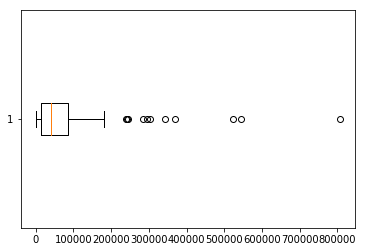

In [91]:
values10=bio1['votes']
plt.boxplot(values10, vert=False)   
plt.show()

In [92]:
bio['votes']=bio['votes'].astype("float").interpolate()

In [93]:
bio.count(axis=0, level=None, numeric_only=False)

budget      94
company     94
country     94
director    94
genre       94
gross       94
name        94
rating      94
released    94
runtime     94
score       94
star        94
votes       94
writer      94
year        94
dtype: int64

In [94]:
bio

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
42,4000000.0,Initial Pictures,UK,Alex Cox,Biography,2826523.0,Sid and Nancy,R,07-11-1986,112.0,7.1,Gary Oldman,25032.0,Alex Cox,1986
50,111000.0,Maljack Productions,USA,John McNaughton,Biography,609939.0,Henry: Portrait of a Serial Killer,R,07-09-1990,83.0,7.0,Michael Rooker,25367.0,Richard Fire,1986
100,8500000.0,Capital Equipment Leasing,UK,Trevor Nunn,Biography,277646.0,Lady Jane,PG-13,07-02-1986,136.0,7.2,Helena Bonham Carter,5364.0,Chris Bryant,1986
114,22000000.0,British Film Institute (BFI),UK,Derek Jarman,Biography,3151.0,Caravaggio,R,29-08-1986,93.0,6.7,Noam Almaz,4072.0,Derek Jarman,1986
161,22000000.0,Canadian Broadcasting Corporation (CBC),Canada,Charles Jarrott,Biography,275000.0,The Boy in Blue,R,17-01-1986,100.0,5.4,Nicolas Cage,907.0,Douglas Bowie,1986
166,14000000.0,Columbia Pictures Corporation,USA,Richard Pryor,Biography,18034150.0,"Jo Jo Dancer, Your Life Is Calling",R,02-05-1986,97.0,6.3,Richard Pryor,1288.0,Rocco Urbisci,1986
186,352885327.0,Caméras Continentales,Denmark,Henning Carlsen,Biography,583800.0,Oviri,R,05-09-1986,100.0,6.2,Donald Sutherland,275.0,Henning Carlsen,1986
256,23000000.0,Recorded Picture Company (RPC),UK,Bernardo Bertolucci,Biography,43984230.0,The Last Emperor,PG-13,15-04-1988,163.0,7.8,John Lone,76408.0,Mark Peploe,1987
257,13000000.0,Touchstone Pictures,USA,Barry Levinson,Biography,123922370.0,"Good Morning, Vietnam",R,15-01-1988,121.0,7.3,Robin Williams,106924.0,Mitch Markowitz,1987
261,6500000.0,Columbia Pictures Corporation,USA,Luis Valdez,Biography,54215416.0,La Bamba,PG-13,24-07-1987,108.0,6.8,Lou Diamond Phillips,22839.0,Luis Valdez,1987


In [95]:
thriller=thriller.replace(0,np.nan)
thriller=thriller.replace(' ',np.nan)

In [96]:
thriller1=thriller.dropna()

In [97]:
thriller.shape

(10, 15)

In [98]:
thriller.count(axis=0, level=None, numeric_only=False)

budget       8
company     10
country     10
director    10
genre       10
gross       10
name        10
rating      10
released    10
runtime     10
score       10
star        10
votes       10
writer      10
year        10
dtype: int64

In [99]:
thriller['rating'].mode()

0    R
dtype: object

In [100]:
fantasy.count(axis=0, level=None, numeric_only=False)

budget      14
company     14
country     14
director    14
genre       14
gross       14
name        14
rating      14
released    14
runtime     13
score       14
star        14
votes       14
writer      14
year        14
dtype: int64

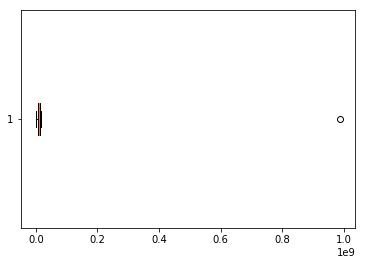

In [101]:
values11=thriller1['budget']
plt.boxplot(values11, vert=False)   
plt.show()

In [102]:
thriller['budget']=thriller['budget'].replace(np.nan,thriller['budget'].median())

In [103]:
thriller

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
37,6000000.0,HBO Films,USA,Robert Harmon,Thriller,5844868.0,The Hitcher,R,21-02-1986,97.0,7.3,Rutger Hauer,36191.0,Eric Red,1986
149,987987787.0,Edward R. Pressman Film,UK,Bob Swaim,Thriller,1131399.0,Half Moon Street,R,26-09-1986,90.0,5.4,Sigourney Weaver,2157.0,Edward Behr,1986
177,9541477.5,"Rank Organisation, The",UK,David Drury,Thriller,750000.0,Defense of the Realm,PG,21-11-1986,96.0,6.6,Gabriel Byrne,1625.0,Martin Stellman,1986
181,9541477.5,Portreeve,UK,Simon Langton,Thriller,1500000.0,The Whistle Blower,PG,10-07-1987,100.0,6.2,Michael Caine,1672.0,Julian Bond,1986
299,6000000.0,Fourth Protocol,UK,John Mackenzie,Thriller,12423831.0,The Fourth Protocol,R,28-08-1987,119.0,6.5,Michael Caine,7532.0,George Axelrod,1987
430,9082955.0,Tapestry Films,USA,Rick King,Thriller,500283.0,The Killing Time,R,23-10-1987,94.0,5.4,Beau Bridges,763.0,Don Bohlinger,1987
641,14000000.0,Orion Pictures,USA,Peter Yates,Thriller,459824.0,The House on Carroll Street,PG,04-03-1988,101.0,6.2,Kelly McGillis,1844.0,Walter Bernstein,1988
861,87585.0,Epic Productions,USA,Peter Masterson,Thriller,337812.0,Night Game,R,15-09-1989,95.0,4.9,Roy Scheider,498.0,Spencer Eastman,1989
948,18000000.0,Morgan Creek Productions,USA,John Schlesinger,Thriller,29381956.0,Pacific Heights,R,28-09-1990,102.0,6.4,Melanie Griffith,15129.0,Daniel Pyne,1990
2190,10000000.0,Middle Fork Productions,USA,Richard Harrah,Thriller,1785.0,The Canyon,R,23-10-2009,100.0,5.9,Eion Bailey,3453.0,Steve Allrich,2009


In [104]:
fantasy=fantasy.replace(0,np.nan)
fantasy=fantasy.replace(' ',np.nan)

fantasy.shape

(14, 15)

In [105]:
fantasy.count(axis=0, level=None, numeric_only=False)

budget      14
company     14
country     14
director    14
genre       14
gross       14
name        14
rating      14
released    14
runtime     13
score       14
star        14
votes       14
writer      14
year        14
dtype: int64

In [106]:
fantasy['rating'].mode()

0    R
dtype: object

In [107]:
fantasy["rating"]=fantasy["rating"].replace("NOT RATED","R")
fantasy["rating"]=fantasy["rating"].replace("Not specified","R")
fantasy["rating"]=fantasy["rating"].replace("UNRATED","R")

In [108]:
crime=crime.replace(0,np.nan)
crime=crime.replace(' ',np.nan)

crime.shape

(165, 15)

In [109]:
crime.count()

budget      144
company     165
country     164
director    165
genre       165
gross       165
name        165
rating      163
released    165
runtime     165
score       165
star        165
votes       165
writer      165
year        165
dtype: int64

In [110]:
crime1=crime.dropna()

In [111]:
crime1['rating'].mode()

0    R
dtype: object

In [112]:
crime1["rating"]=crime1["rating"].replace("NOT RATED","R")
crime1["rating"]=crime1["rating"].replace("Not specified","R")
crime1["rating"]=crime1["rating"].replace("UNRATED","R")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [113]:
crime['rating']=crime['rating'].replace(np.nan,"R")

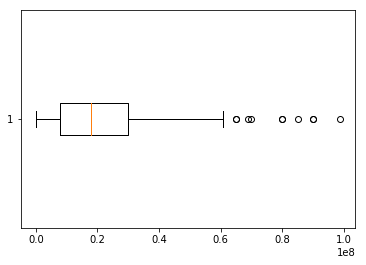

In [114]:
values12=crime1['budget']
plt.boxplot(values12, vert=False)   
plt.show()

In [115]:
crime['budget']=crime['budget'].astype("float").interpolate()

In [116]:
crime

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
14,1.500000e+07,De Laurentiis Entertainment Group (DEG),NaN,Michael Mann,Crime,8620929.0,Manhunter,R,15-08-1986,120.0,7.2,William Petersen,54000.0,Thomas Harris,1986
26,1.000000e+07,Neue Constantin Film,Italy,Jean-Jacques Annaud,Crime,7153487.0,The Name of the Rose,R,24-09-1986,130.0,7.8,Sean Connery,86991.0,Umberto Eco,1986
29,1.900000e+06,Hemdale,USA,Tim Hunter,Crime,4600000.0,River's Edge,R,08-05-1987,99.0,7.1,Crispin Glover,12862.0,Neal Jimenez,1986
62,6.500000e+06,Cinema '85,USA,James Foley,Crime,2347000.0,At Close Range,R,18-04-1986,111.0,7.0,Sean Penn,11607.0,Elliott Lewitt,1986
75,1.539568e+07,American Filmworks,USA,Sidney Lumet,Crime,25147055.0,The Morning After,R,25-12-1986,103.0,6.0,Jane Fonda,4943.0,James Cresson,1986
80,2.429137e+07,Cannon Group,USA,John Frankenheimer,Crime,5186646.0,52 Pick-Up,R,07-11-1986,110.0,6.4,Roy Scheider,3866.0,Elmore Leonard,1986
101,3.318705e+07,Columbia Pictures Corporation,USA,Thomas Michael Donnelly,Crime,7634909.0,Quicksilver,PG,14-02-1986,105.0,5.6,Kevin Bacon,3720.0,Thomas Michael Donnelly,1986
105,4.208274e+07,TriStar Pictures,USA,Richard Pearce,Crime,12303904.0,No Mercy,R,19-12-1986,106.0,5.7,Richard Gere,5564.0,James Carabatsos,1986
109,5.097842e+07,HandMade Films,UK,Neil Jordan,Crime,5794184.0,Mona Lisa,R,13-06-1986,104.0,7.4,Bob Hoskins,10747.0,Neil Jordan,1986
115,5.987410e+07,Les Films Plain Chant,France,Leos Carax,Crime,21483.0,Mauvais Sang,UNRATED,26-11-1986,116.0,7.3,Michel Piccoli,4922.0,Leos Carax,1986


In [117]:
crime['country'].mode()

0    USA
dtype: object

In [118]:
crime['country']=crime['country'].replace(np.nan,'USA')

In [119]:
crime.count()

budget      165
company     165
country     165
director    165
genre       165
gross       165
name        165
rating      165
released    165
runtime     165
score       165
star        165
votes       165
writer      165
year        165
dtype: int64

In [120]:
comedy=comedy.replace(0,np.nan)
comedy=comedy.replace(' ',np.nan)

comedy.shape

(705, 15)

In [121]:
comedy.count()

budget      627
company     705
country     694
director    705
genre       705
gross       695
name        705
rating      704
released    705
runtime     701
score       698
star        705
votes       700
writer      705
year        705
dtype: int64

In [122]:
comedy1=comedy.dropna()

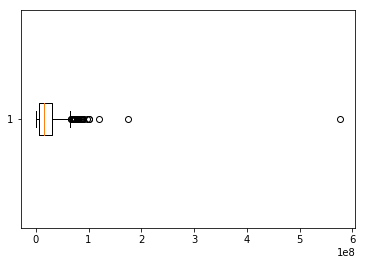

In [123]:
values13=comedy1['budget']
plt.boxplot(values13, vert=False)   
plt.show()

Ii is better to interpolation

In [124]:
comedy['budget']=comedy['budget'].astype("float").interpolate()

there are many outliers and the dat is categorical so better to replace mode

In [125]:
comedy1['country'].mode()

0    USA
dtype: object

In [126]:
comedy['country']=comedy['country'].replace(np.nan,'USA')

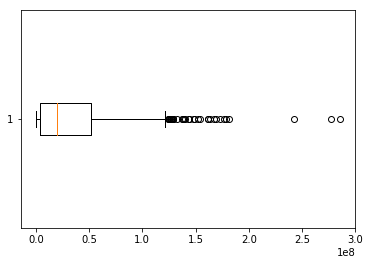

In [127]:
values14=comedy1['gross']
plt.boxplot(values14, vert=False)   
plt.show()

In [128]:
comedy['gross']=comedy['gross'].astype("float").interpolate()

In [129]:
comedy1['rating'].mode()

0    R
dtype: object

In [130]:
comedy["rating"]=comedy["rating"].replace("NOT RATED","R")
comedy["rating"]=comedy["rating"].replace("Not specified","R")
comedy["rating"]=comedy["rating"].replace("UNRATED","R")
comedy['rating']=comedy['rating'].replace(np.nan,"R")

In [131]:
comedy['runtime']=comedy['runtime'].astype("float").interpolate()

In [132]:
comedy['score']=comedy['score'].astype("float").interpolate()

In [133]:
comedy['votes']=comedy['votes'].astype("float").interpolate()

In [134]:
mystery=mystery.replace(0,np.nan)
mystery=mystery.replace(' ',np.nan)
war=war.replace(0,np.nan)
war=war.replace(' ',np.nan)
animation=animation.replace(0,np.nan)
animation=animation.replace(' ',np.nan)
action=action.replace(0,np.nan)
action=action.replace(' ',np.nan)
drama=drama.replace(0,np.nan)
drama=drama.replace(' ',np.nan)


print(mystery.shape,war.shape,animation.shape,action.shape,drama.shape)

(18, 15) (2, 15) (82, 15) (570, 15) (405, 15)


In [135]:
war

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
543,NaN,A&M; Films,USA,Kevin Reynolds,War,161004.0,The Beast of War,R,07-09-1988,111.0,7.4,George Dzundza,7675.0,William Mastrosimone,1988
631,4940895.0,Cannon International,NaN,Aaron Norris,War,1348771.0,Platoon Leader,R,1988-10,97.0,5.4,Tony Pierce,1193.0,Andrew Deutsch,1988


better to remove these two rows because there ae no best ways to replace Nan Values

In [136]:
mystery.count()

budget      17
company     18
country     18
director    18
genre       18
gross       18
name        18
rating      18
released    18
runtime     18
score       18
star        18
votes       18
writer      18
year        18
dtype: int64

In [137]:
mystery['budget']=mystery['budget'].astype("float").interpolate()

In [138]:
mystery['rating'].mode()

0    R
dtype: object

In [139]:
mystery["rating"]=mystery["rating"].replace("NOT RATED","R")
mystery["rating"]=mystery["rating"].replace("Not specified","R")
mystery["rating"]=mystery["rating"].replace("UNRATED","R")


In [140]:
animation.count()

budget      75
company     82
country     78
director    82
genre       82
gross       82
name        82
rating      82
released    82
runtime     81
score       81
star        82
votes       81
writer      82
year        82
dtype: int64

In [141]:
animation['rating'].mode()

0    PG
dtype: object

In [142]:
action1=action.dropna()
action1['rating'].mode()

0    R
dtype: object

In [143]:
drama1=drama.dropna()
drama1['rating'].mode()

0    R
dtype: object

In [144]:
animation["rating"]=animation["rating"].replace("NOT RATED","PG")
animation["rating"]=animation["rating"].replace("Not specified","PG")
animation["rating"]=animation["rating"].replace("UNRATED","PG")

In [145]:
action["rating"]=action["rating"].replace("NOT RATED","R")
action["rating"]=action["rating"].replace("Not specified","R")
action["rating"]=action["rating"].replace("UNRATED","R")
action["rating"]=action["rating"].replace(np.nan,"R")
drama["rating"]=drama["rating"].replace("NOT RATED","R")
drama["rating"]=drama["rating"].replace("Not specified","R")
drama["rating"]=drama["rating"].replace("UNRATED","R")
drama["rating"]=drama["rating"].replace(np.nan,"R")

In [146]:
action.count()

budget      544
company     570
country     563
director    570
genre       570
gross       564
name        570
rating      570
released    570
runtime     567
score       569
star        570
votes       566
writer      570
year        570
dtype: int64

In [147]:
drama.count()

budget      351
company     405
country     404
director    405
genre       405
gross       401
name        405
rating      405
released    405
runtime     401
score       403
star        405
votes       404
writer      405
year        405
dtype: int64

In [148]:
animation1=animation.dropna()
animation['votes']=animation['votes'].replace(np.nan,animation1['votes'].mode())

In [149]:
animation['score']=animation['score'].replace(np.nan,animation1['score'].mode())
animation['runtime']=animation['runtime'].replace(np.nan,animation1['runtime'].mode())

In [150]:
animation1['country'].mode()

0    USA
dtype: object

In [151]:
animation['country']=animation['country'].replace(np.nan,'USA')

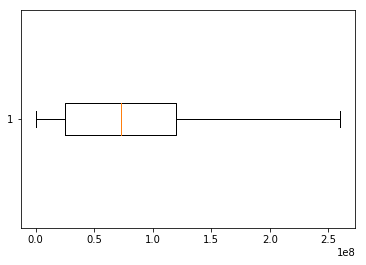

In [152]:
values16=animation1['budget']
plt.boxplot(values16, vert=False)   
plt.show()

In [153]:
animation['budget']=animation['budget'].replace(np.nan,animation1['budget'].mean())

In [154]:
animation.count()

budget      82
company     82
country     82
director    82
genre       82
gross       82
name        82
rating      82
released    82
runtime     81
score       81
star        82
votes       81
writer      82
year        82
dtype: int64

In [155]:
drama1=drama.dropna()
drama['votes']=drama['votes'].replace(np.nan,drama1['votes'].median())


In [156]:
drama['score']=drama['score'].replace(np.nan,drama1['score'].mean())
drama['runtime']=drama['runtime'].replace(np.nan,drama1['runtime'].median())

In [157]:
drama['country'].mode()

0    USA
dtype: object

In [158]:
drama['country']=drama['country'].replace(np.nan,"USA")

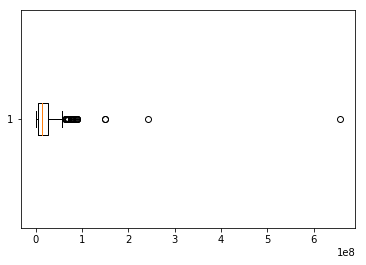

In [159]:
values17=drama1['budget']
plt.boxplot(values17, vert=False)   
plt.show()

In [160]:
drama['budget']=drama['budget'].astype('float').interpolate()

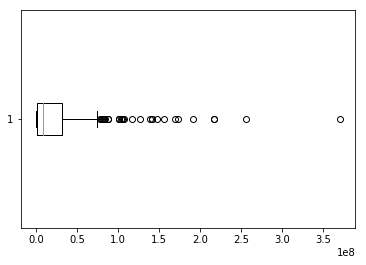

In [161]:
values18=drama1['gross']
plt.boxplot(values18, vert=False)   
plt.show()

In [162]:
drama1['gross'].median()

8742750.0

In [163]:
drama['gross']=drama['gross'].replace(np.nan,drama1['gross'].median())

In [164]:
drama.count()

budget      405
company     405
country     405
director    405
genre       405
gross       405
name        405
rating      405
released    405
runtime     405
score       405
star        405
votes       405
writer      405
year        405
dtype: int64

In [165]:
action1=action.dropna()

In [166]:
action1['score'].mode()

0    6.7
dtype: float64

In [167]:
action['score']=action['score'].replace(np.nan,6.7)

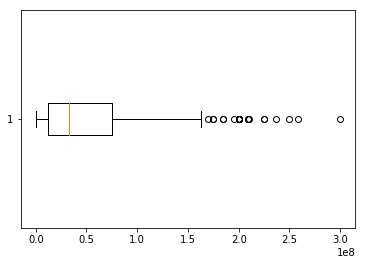

In [168]:
values19=action1['budget']
plt.boxplot(values19, vert=False)   
plt.show()

In [169]:
action['budget']=action['budget'].astype("float").interpolate()

In [170]:
action1['country'].mode()

0    USA
dtype: object

In [171]:
action['country']=action['country'].replace(np.nan,'USA')

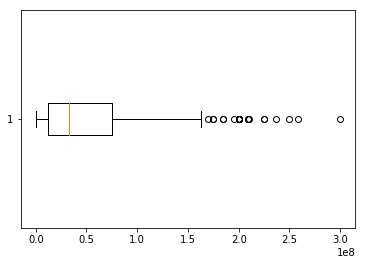

In [172]:
values20=action1['budget']
plt.boxplot(values20, vert=False)   
plt.show()

In [173]:
action['gross']=action['gross'].astype("float").interpolate()

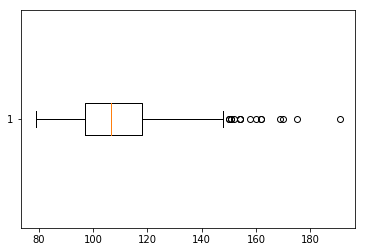

In [174]:
values21=action1['runtime']
plt.boxplot(values21, vert=False)   
plt.show()

In [175]:
action['runtime']=action['runtime'].replace(np.nan,action['runtime'].median())

In [176]:
action['votes']=action['votes'].replace(np.nan,action['votes'].median())

In [177]:
action.count()

budget      570
company     570
country     570
director    570
genre       570
gross       570
name        570
rating      570
released    570
runtime     570
score       570
star        570
votes       570
writer      570
year        570
dtype: int64

In [178]:
df_list=[rom,fam,scifi,horror,bio,thriller,fantasy,crime,comedy,mystery,animation,action,adven,drama]
result=pd.concat(df_list,ignore_index=True)

In [179]:
result

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,1412434,CB Films,France,Catherine Breillat,Romance,410109,36 fillette,PG,06-01-1989,88.0,6.0000,Delphine Zentout,938.0,Catherine Breillat,1988
1,8272908,Golan-Globus Productions,USA,Boaz Davidson,Romance,8.89259e+06,Salsa,PG,06-05-1988,98.0,4.9000,Draco Rosa,900.0,Boaz Davidson,1988
2,100000,Hyperion Pictures,USA,Carroll Ballard,Family,781727,Nutcracker,G,26-11-1986,100.0,7.2000,Hugh Bigney,578.0,Kent Stowell,1986
3,453456,DIC Entertainment,Canada,Bruno Bianchi,Family,2.17583e+06,Heathcliff: The Movie,G,17-01-1986,73.0,5.3000,Mel Blanc,187.0,George Gately,1986
4,5e+06,Columbia Pictures Corporation,Sweden,Ken Annakin,Family,3.56994e+06,Las travesuras de una pelirojja,G,29-07-1988,100.0,5.9000,Tami Erin,3474.0,Astrid Lindgren,1988
5,3.5e+07,TMS Entertainment,Japan,Masami Hata,Family,1.36821e+06,Little Nemo: Adventures in Slumberland,G,21-08-1992,85.0,7.2000,Gabriel Damon,5800.0,Chris Columbus,1989
6,2e+07,Ben-Ami/Leeds Productions,USA,Charles T. Kanganis,Family,1.1784e+07,3 Ninjas Kick Back,PG,06-05-1994,93.0,4.4000,Victor Wong,7189.0,Sang-ok Shin,1994
7,1.8e+07,Gladden Entertainment,USA,Marshall Brickman,Sci-Fi,3.9e+06,The Manhattan Project,PG-13,13-06-1986,117.0,6.1000,John Lithgow,4666.0,Marshall Brickman,1986
8,3.65556e+06,Trans World Entertainment (TWE),USA,David Keith,Sci-Fi,1.93e+06,The Curse,R,11-09-1987,92.0,4.9000,Wil Wheaton,1762.0,David Chaskin,1987
9,4e+06,Lightyear Entertainment,USA,Jim Wynorski,Sci-Fi,192816,The Return of Swamp Thing,PG-13,12-05-1989,84.0,4.5000,Dick Durock,3054.0,Len Wein,1989


In [180]:
df.shape

(2361, 15)

In [181]:
result.count()

budget      2358
company     2358
country     2358
director    2358
genre       2358
gross       2358
name        2358
rating      2358
released    2358
runtime     2356
score       2357
star        2358
votes       2357
writer      2358
year        2358
dtype: int64

In [182]:
result=result.dropna()

In [183]:
result.count()

budget      2354
company     2354
country     2354
director    2354
genre       2354
gross       2354
name        2354
rating      2354
released    2354
runtime     2354
score       2354
star        2354
votes       2354
writer      2354
year        2354
dtype: int64

In [184]:
result['budget'] = pd.to_numeric(result['budget'],errors='coerce')
result['gross'] = pd.to_numeric(result['gross'],errors='coerce')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [185]:
data_type1=result.dtypes
print(data_type1)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


In [186]:
for index,row in result.rating.iteritems():
    if(result.loc[index,'rating']=="UNRATED"):
        print(index)
print(result.loc[268,'genre'],result.loc[324,'genre'])

268
324
Crime Crime


In [187]:
for index,row in result.rating.iteritems():
    if(result.loc[index,'rating']=="NOT RATED"):
        print(index)
print(result.loc[295,'genre'],result.loc[369,'genre'])

295
369
Crime Crime


In [188]:
for index,row in result.rating.iteritems():
    if(result.loc[index,'rating']=="Not specified"):
        print(index)
print(result.loc[270,'genre'],result.loc[297,'genre'])
print(crime['rating'].mode())
result.loc[270,'rating']='R'
result.loc[297,'rating']='R'
result.loc[268,'rating']='R'
result.loc[324,'rating']='R'
result.loc[295,'rating']='R'
result.loc[369,'rating']='R'

270
297
Crime Crime
0    R
dtype: object


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [189]:
result.count()

budget      2354
company     2354
country     2354
director    2354
genre       2354
gross       2353
name        2354
rating      2354
released    2354
runtime     2354
score       2354
star        2354
votes       2354
writer      2354
year        2354
dtype: int64

In [190]:
for index,row in result.gross.iteritems():
    if(np.isnan(row)):
        print(index)
    

1839


In [191]:
result=result.dropna()

In [192]:
result.count()

budget      2353
company     2353
country     2353
director    2353
genre       2353
gross       2353
name        2353
rating      2353
released    2353
runtime     2353
score       2353
star        2353
votes       2353
writer      2353
year        2353
dtype: int64

In [193]:
cond = result.budget > result.gross

result.loc[cond, ['budget', 'gross']] = result.loc[cond, ['gross', 'budget']].values

In [194]:
result


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,410109.0,CB Films,France,Catherine Breillat,Romance,1412434.0,36 fillette,PG,06-01-1989,88.0,6.0000,Delphine Zentout,938.0,Catherine Breillat,1988
1,8272908.0,Golan-Globus Productions,USA,Boaz Davidson,Romance,8892589.0,Salsa,PG,06-05-1988,98.0,4.9000,Draco Rosa,900.0,Boaz Davidson,1988
2,100000.0,Hyperion Pictures,USA,Carroll Ballard,Family,781727.0,Nutcracker,G,26-11-1986,100.0,7.2000,Hugh Bigney,578.0,Kent Stowell,1986
3,453456.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2175833.0,Heathcliff: The Movie,G,17-01-1986,73.0,5.3000,Mel Blanc,187.0,George Gately,1986
4,3569939.0,Columbia Pictures Corporation,Sweden,Ken Annakin,Family,5000000.0,Las travesuras de una pelirojja,G,29-07-1988,100.0,5.9000,Tami Erin,3474.0,Astrid Lindgren,1988
5,1368210.0,TMS Entertainment,Japan,Masami Hata,Family,35000000.0,Little Nemo: Adventures in Slumberland,G,21-08-1992,85.0,7.2000,Gabriel Damon,5800.0,Chris Columbus,1989
6,11784000.0,Ben-Ami/Leeds Productions,USA,Charles T. Kanganis,Family,20000000.0,3 Ninjas Kick Back,PG,06-05-1994,93.0,4.4000,Victor Wong,7189.0,Sang-ok Shin,1994
7,3900000.0,Gladden Entertainment,USA,Marshall Brickman,Sci-Fi,18000000.0,The Manhattan Project,PG-13,13-06-1986,117.0,6.1000,John Lithgow,4666.0,Marshall Brickman,1986
8,1930001.0,Trans World Entertainment (TWE),USA,David Keith,Sci-Fi,3655565.0,The Curse,R,11-09-1987,92.0,4.9000,Wil Wheaton,1762.0,David Chaskin,1987
9,192816.0,Lightyear Entertainment,USA,Jim Wynorski,Sci-Fi,4000000.0,The Return of Swamp Thing,PG-13,12-05-1989,84.0,4.5000,Dick Durock,3054.0,Len Wein,1989


In [196]:
result.to_csv(r'desktop/cleaneddata1.csv')